In [40]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [41]:
file_path = r"C:\Users\Admin\Desktop\BrainWave Matrix Intern\sentimentdataset.csv"
df = pd.read_csv(file_path)

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  732 non-null    int64 
 1   Unnamed: 0    732 non-null    int64 
 2   Text          732 non-null    object
 3   Sentiment     732 non-null    object
 4   Timestamp     732 non-null    object
 5   User          732 non-null    object
 6   Platform      732 non-null    object
 7   Hashtags      732 non-null    object
 8   Retweets      732 non-null    int64 
 9   Likes         732 non-null    int64 
 10  Country       732 non-null    object
 11  Year          732 non-null    int64 
 12  Month         732 non-null    int64 
 13  Day           732 non-null    int64 
 14  Hour          732 non-null    int64 
dtypes: int64(8), object(7)
memory usage: 85.9+ KB
None


In [43]:
print(df.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

         Timestamp            User     Platform  \
0  1/15/2023 12:30   User123          Twitter     
1   1/15/2023 8:45   CommuterX        Twitter     
2  1/15/2023 15:45   FitnessFan      Instagram    
3  1/15/2023 18:20   AdventureX       Facebook    
4  1/15/2023 19:55   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature

In [44]:
if 'Text' not in df.columns:
    raise ValueError("The dataset must contain a 'Text' column for sentiment analysis.")

In [45]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'#\w+', '', text)    # Remove hashtags
    text = re.sub(r'\d+', '', text)     # Remove numbers
    text = text.lower()                 # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [46]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Processed_Text'] = df['Cleaned_Text'].apply(preprocess_text)

In [48]:
preprocessed_file = "processed_sentimentdataset.csv"
df.to_csv(preprocessed_file, index=False)
print(f"Data saved to '{preprocessed_file}'")

Data saved to 'processed_sentimentdataset.csv'


In [49]:
sid = SentimentIntensityAnalyzer()

In [50]:
df['Sentiment'] = df['Processed_Text'].apply(lambda x: sid.polarity_scores(x))
df['Sentiment_Compound'] = df['Sentiment'].apply(lambda x: x['compound'])

In [51]:
df['Sentiment_Category'] = df['Sentiment_Compound'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

In [52]:
sentiment_file = "sentimentdataset_with_sentiment.csv"
df.to_csv(sentiment_file, index=False)
print(f"Data saved to '{sentiment_file}'")

Data saved to 'sentimentdataset_with_sentiment.csv'


In [53]:
df = pd.read_csv(sentiment_file)

In [54]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Handle invalid dates gracefully
    df = df.dropna(subset=['Date'])  # Drop rows with invalid dates
    df.set_index('Date', inplace=True)

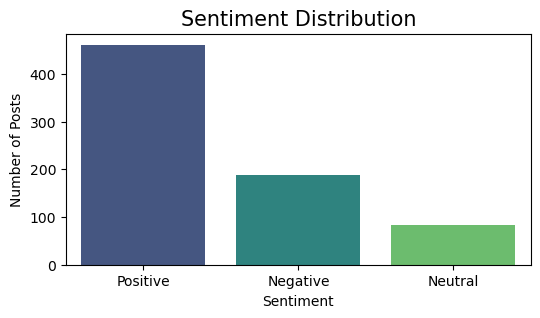

In [56]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Sentiment_Category', palette='viridis')
plt.title('Sentiment Distribution', fontsize=15)
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

In [57]:
positive_text = ' '.join(df[df['Sentiment_Category'] == 'Positive']['Processed_Text'])
negative_text = ' '.join(df[df['Sentiment_Category'] == 'Negative']['Processed_Text'])
neutral_text = ' '.join(df[df['Sentiment_Category'] == 'Neutral']['Processed_Text'])

In [58]:
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
wordcloud_neu = WordCloud(width=800, height=400, background_color='grey').generate(neutral_text)

(-0.5, 799.5, 399.5, -0.5)

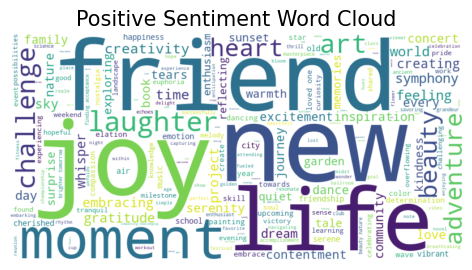

In [59]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud', fontsize=15)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

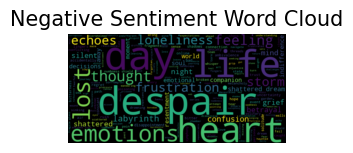

In [60]:
plt.subplot(3, 1, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud', fontsize=15)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

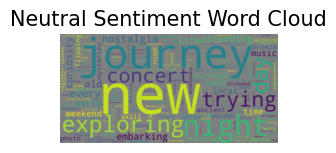

In [61]:
plt.subplot(3, 1, 3)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud', fontsize=15)
plt.axis('off')

In [62]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [63]:
if 'Date' in df.columns:
    sentiment_trend = df.resample('D').mean()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=sentiment_trend, x=sentiment_trend.index, y='Sentiment_Compound', palette='coolwarm')
    plt.title('Sentiment Trends Over Time', fontsize=15)
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment')
    plt.show()
else:
    print("No 'Date' column found. Skipping sentiment trends visualization.")

No 'Date' column found. Skipping sentiment trends visualization.
